In [1]:
import pandas as pd
import numpy as np
import os
import psycopg2 as pg
from sqlalchemy import create_engine
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
#db settings
host = 'database-airbnb.cl4bob5uux9z.us-west-1.rds.amazonaws.com'
dbname= 'postgres'
user ='postgres'
port = 5432
password ='****'

# PYTHON FUNCTION TO CONNECT TO THE POSTGRESQL DATABASE AND
# RETURN THE SQLACHEMY ENGINE OBJECT
def get_connection():
    return create_engine(
        url="postgresql://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, dbname
        )
    )
  
  
if __name__ == '__main__':
  
    try:
        # GET THE CONNECTION OBJECT (ENGINE) FOR THE DATABASE
        engine = get_connection()
        print(
            f"Connection to the {host} for user {user} created successfully.")
    except Exception as ex:
        print("Connection could not be made due to the following error: \n", ex)

Connection to the database-airbnb.cl4bob5uux9z.us-west-1.rds.amazonaws.com for user postgres created successfully.


In [3]:
listings = pd.read_sql_query("SELECT * FROM listings", con=engine)
listings

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,avg_score_rating
0,23968985.0,Apartment24-Breitensee 200m away from Metro U3,756858.0,Manfred,Penzing,48.20167,16.31326,Entire home/apt,50.0,5.0,...,2,4.74,4.96,4.87,4.78,4.91,4.78,4.91,1,4.85
1,23969875.0,gemütliches WG-Zimmer in schönster Lage,79246221.0,Judith,Neubau,48.19820,16.34387,Private room,28.0,2.0,...,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,5.00
2,23970635.0,gemütliches WG-Zimmer in schönster Lage,79246221.0,Judith,Neubau,48.19806,16.34403,Shared room,35.0,1.0,...,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,5.00
3,23971262.0,Zimmer frei,93310783.0,Valerie,Dbling,48.24959,16.34152,Private room,15.0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,23971970.0,---SUNNY 2-ROOM-APARTMENT WITH TERRACE---,79782555.0,Mona,Brigittenau,48.23230,16.37217,Entire home/apt,59.0,2.0,...,2,4.78,4.78,4.89,4.78,5.00,4.67,4.89,0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11447,44411139.0,Zweibettzimmer 5,356311942.0,Ljiljana,Floridsdorf,48.31872,16.44033,Private room,49.0,1.0,...,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,5.00
11448,47347967.0,Bed & Breakfast in Wien,382275817.0,Zlatko,Liesing,48.12613,16.32020,Private room,60.0,1.0,...,16,4.00,5.00,5.00,5.00,5.00,4.00,4.00,0,4.57
11449,50233694.0,Wien Apartment Heurigenstraße von Perchtoldsdorf,181279378.0,Loredana,Liesing,48.12657,16.26019,Entire home/apt,53.0,3.0,...,2,5.00,5.00,4.83,5.00,5.00,5.00,5.00,1,4.98
11450,50262469.0,"Cozy, Comodo, gemütliche apartmen near the air...",170393960.0,Diana & Miguel,Simmering,48.14626,16.47259,Entire home/apt,50.0,1.0,...,4,4.85,4.85,4.92,4.93,4.92,4.75,4.87,0,4.87


In [4]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'property_type',
       'accommodates', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'avg_score_rating'],
      dtype='object')

#### Hosts with most listings

In [5]:
listings_nr = pd.read_sql_query("SELECT MAX (DISTINCT calculated_host_listings_count) as nr_listings \
FROM listings GROUP BY host_name ORDER BY nr_listings DESC", con=engine)
listings_nr

,nr_listings
0,101.0
1,93.0
2,86.0
3,81.0
4,75.0
...,...
2661,1.0
2662,1.0
2663,1.0
2664,1.0


In [6]:
#create calculated column
conditions = [
    listings_nr['nr_listings'].eq(1),
    listings_nr['nr_listings'].eq(2),
    listings_nr['nr_listings'].eq(3),
    listings_nr['nr_listings'].eq(4),
    listings_nr['nr_listings'].eq(5),
    listings_nr['nr_listings'].eq(6),
    listings_nr['nr_listings'].eq(7),
    listings_nr['nr_listings'].eq(8),
    listings_nr['nr_listings'].eq(9),
    listings_nr['nr_listings']>=10
]
choices = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '+10']
listings_nr['nr_groups'] = np.select(conditions, choices, default=0)

In [7]:
listings_nr = listings_nr.groupby(by=['nr_groups']).sum().reset_index()
listings_nr.sort_values(by=['nr_groups'],ascending=False)

,nr_groups,nr_listings
9,9,108.0
8,8,152.0
7,7,189.0
6,6,240.0
5,5,260.0
4,4,384.0
3,3,462.0
2,2,778.0
1,1,1780.0
0,+10,2570.0


In [8]:
fig = px.bar(listings_nr, x='nr_groups', y='nr_listings', title='Number of total listings per host', labels={'nr_groups':'listings per host', 'nr_listings':'listings'}, text_auto=True)
fig.show()

#### Hosts with most reviews and best rating (all time reviews_per_month)?

In [9]:
query = "SELECT host_name, neighbourhood, accommodates, MIN (DISTINCT minimum_nights) as min_nights, MAX (DISTINCT host_is_superhost) as superhost, COUNT (DISTINCT calculated_host_listings_count) as nr_listings, CAST(AVG(DISTINCT price) as decimal(10)) as price, SUM(DISTINCT reviews_per_month)*100 AS reviews_all_time, CAST(AVG(avg_score_rating) as DECIMAL(10,2)) as avg_rating, CAST(sum(avg_score_rating *  reviews_per_month) / sum( reviews_per_month) as decimal(10,2)) as weighted_avg FROM listings WHERE reviews_per_month > 0 GROUP BY host_name, neighbourhood, accommodates"
nr_of_reviews = pd.read_sql_query(query, con=engine)
print(nr_of_reviews['accommodates'].median())
print(nr_of_reviews['reviews_all_time'].median())
nr_of_reviews.sort_values(by=['reviews_all_time'], ascending=False).head(20)

3.0
57.99999999999999


,host_name,neighbourhood,accommodates,min_nights,superhost,nr_listings,price,reviews_all_time,avg_rating,weighted_avg
4809,Olivia,Simmering,2,1.0,1.0,1,39.0,13350.0,4.87,4.87
4750,Numa | Wood,Rudolfsheim-Fnfhaus,2,1.0,1.0,1,89.0,6140.0,4.83,4.81
262,Ali,Favoriten,2,1.0,0.0,1,74.0,5480.0,4.51,4.55
2029,Eva & Friends,Wieden,2,2.0,1.0,1,140.0,4722.0,4.91,4.91
274,Ali,Mariahilf,2,1.0,0.0,1,65.0,4112.0,4.51,4.53
3231,Katalin,Neubau,2,1.0,1.0,1,55.0,4049.0,4.86,4.86
3356,Khurshed,Leopoldstadt,2,1.0,0.0,1,13.0,3734.0,3.92,3.98
2988,Jo&Joe,Rudolfsheim-Fnfhaus,1,1.0,1.0,1,25.0,3647.0,4.80,4.86
5868,Superbude Wien Prater,Leopoldstadt,2,1.0,1.0,1,79.0,3217.0,4.94,4.90
4374,Michael,Meidling,2,1.0,0.0,2,56.0,3093.0,4.76,4.77


#### Hosts with most reviews and best rating (last year) ?

In [10]:
query = "SELECT host_name, neighbourhood, COUNT (DISTINCT minimum_nights) as min_nights, \
COUNT (DISTINCT host_is_superhost) as superhost, COUNT (DISTINCT calculated_host_listings_count) as nr_listings, \
CAST(AVG(DISTINCT price) as decimal(10)) as price, SUM (number_of_reviews_ltm) AS number_of_reviews_year, \
CAST(AVG(avg_score_rating) as DECIMAL(10,2)) as avg_rating, CAST(sum(avg_score_rating * number_of_reviews_ltm) / sum(number_of_reviews_ltm) as decimal(10,2)) as weighted_avg, \
CAST(AVG (review_scores_rating) as DECIMAL(10,2)) AS scores_avg, CAST(AVG (review_scores_cleanliness) as DECIMAL(10,2)) AS clean_avg, \
CAST(AVG (review_scores_checkin) as DECIMAL(10,2)) AS checkin_avg, CAST(AVG (review_scores_communication) as DECIMAL(10,2)) AS comm_avg, \
CAST(AVG (review_scores_location) as DECIMAL(10,2)) AS location_avg, CAST(AVG (review_scores_value) as DECIMAL(10,2)) AS val_avg \
FROM listings WHERE number_of_reviews_ltm > 0 \
GROUP BY host_name, neighbourhood"
nr_of_reviews_ltm = pd.read_sql_query(query, con=engine)
print(nr_of_reviews_ltm['number_of_reviews_year'].median())
nr_of_reviews_ltm.sort_values(by=['number_of_reviews_year'], ascending=False).head(20)

9.0


,host_name,neighbourhood,min_nights,superhost,nr_listings,price,number_of_reviews_year,avg_rating,weighted_avg,scores_avg,clean_avg,checkin_avg,comm_avg,location_avg,val_avg
1877,Numa | Wood,Rudolfsheim-Fnfhaus,1,1,1,85.0,880.0,4.82,4.80,4.83,4.83,4.85,4.85,4.74,4.75
1643,Martin,Landstra§e,3,2,5,91.0,777.0,4.73,4.69,4.68,4.66,4.84,4.77,4.73,4.67
1351,Khurshed,Leopoldstadt,1,1,1,13.0,663.0,3.98,4.07,3.64,3.16,4.49,4.24,4.31,3.96
820,Eva & Friends,Wieden,1,1,1,205.0,652.0,4.92,4.92,4.91,4.95,4.90,4.90,4.96,4.87
110,Ali,Mariahilf,1,1,1,169.0,644.0,4.50,4.57,4.35,4.51,4.56,4.63,4.76,4.34
106,Ali,Favoriten,1,1,1,74.0,604.0,4.51,4.56,4.47,4.40,4.63,4.63,4.61,4.35
2486,Ursula,Innere Stadt,3,2,3,105.0,592.0,4.66,4.67,4.45,4.52,4.81,4.76,4.98,4.51
108,Ali,Landstra§e,3,2,2,104.0,556.0,4.48,4.52,4.32,4.29,4.56,4.71,4.60,4.41
1357,Khurshed,Wieden,1,1,1,12.0,544.0,4.35,4.36,4.09,3.97,4.48,4.35,4.76,4.38
2039,Raphael,Ottakring,1,1,1,51.0,542.0,4.33,4.37,4.04,3.92,4.73,4.63,4.36,4.20


#### Wordcloud for hosts

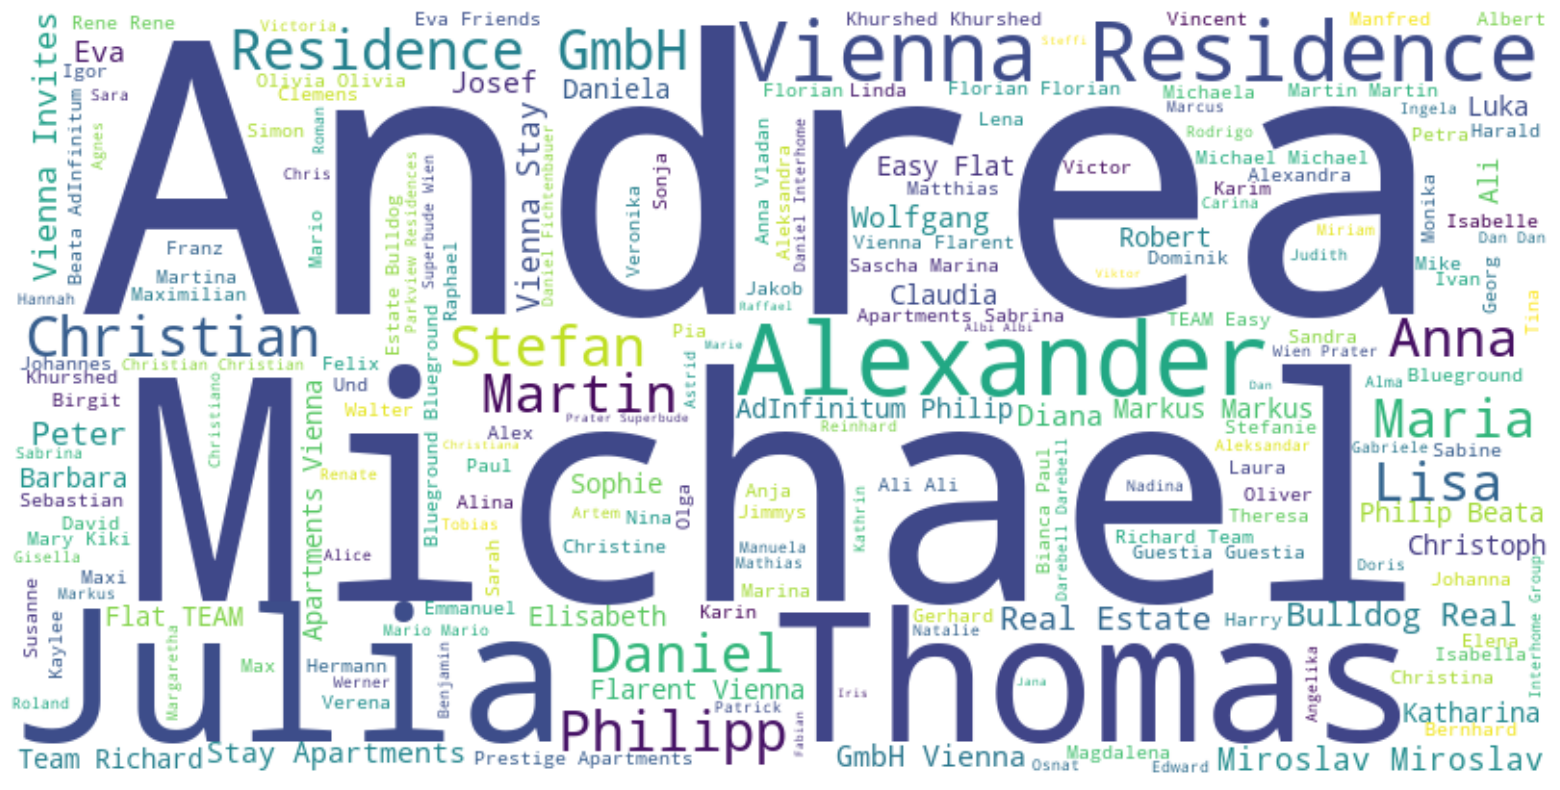

In [11]:
host_names = listings.host_name.values

# wordcloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(host_names))

# show the image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Michael, Andrea, Julia, Thomas, Daniel are the most popular host names

#### Wordcloud for neighbourhoods

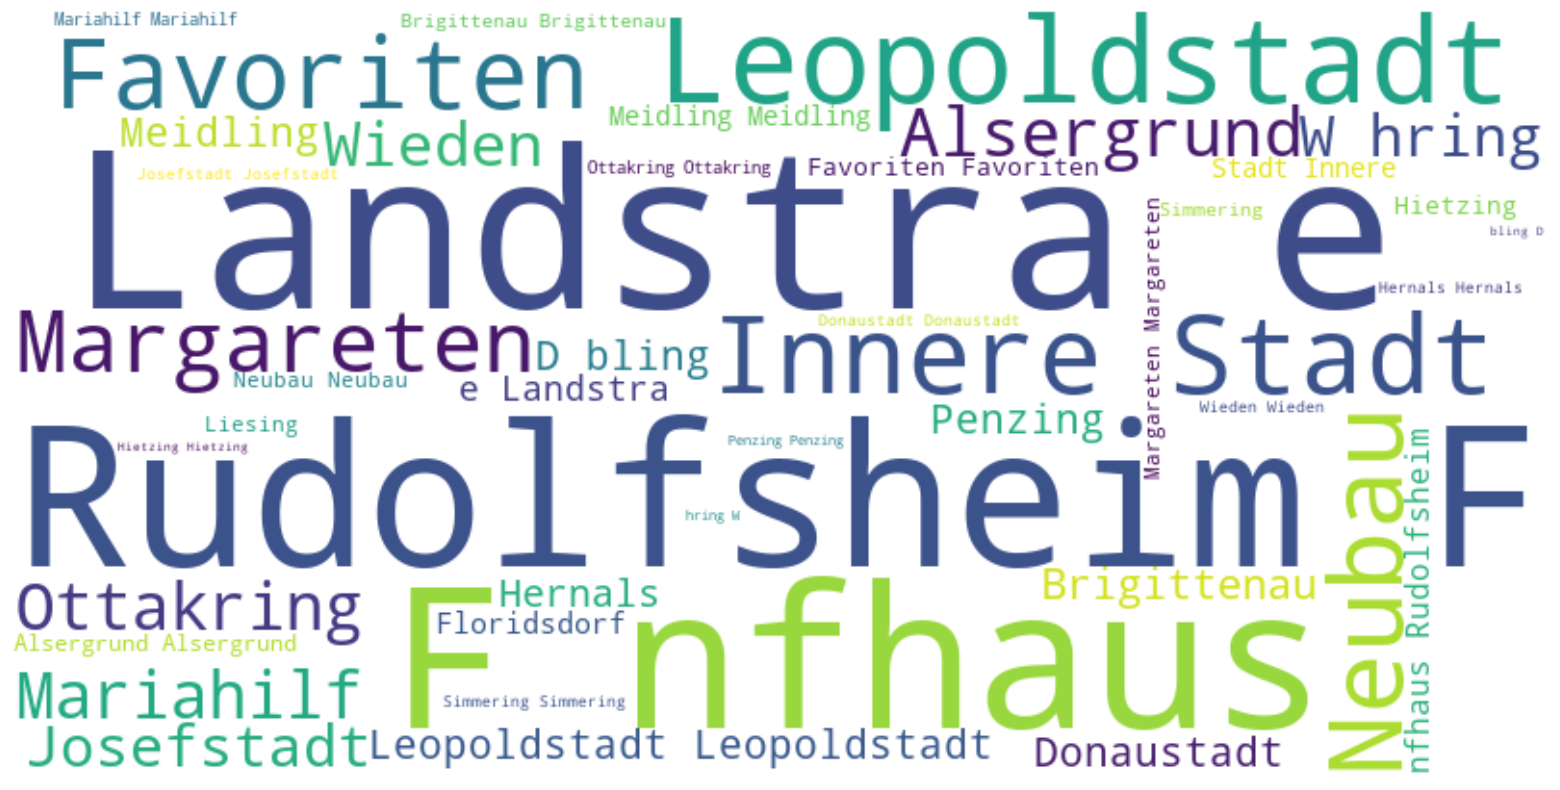

In [12]:
neighbourhoods = listings.neighbourhood.values

# wordcloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(neighbourhoods))

# show the image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most popular neighboourhoods are Landstrasse, Leopoldstadt, Rudolfsheim, Fünfhaus

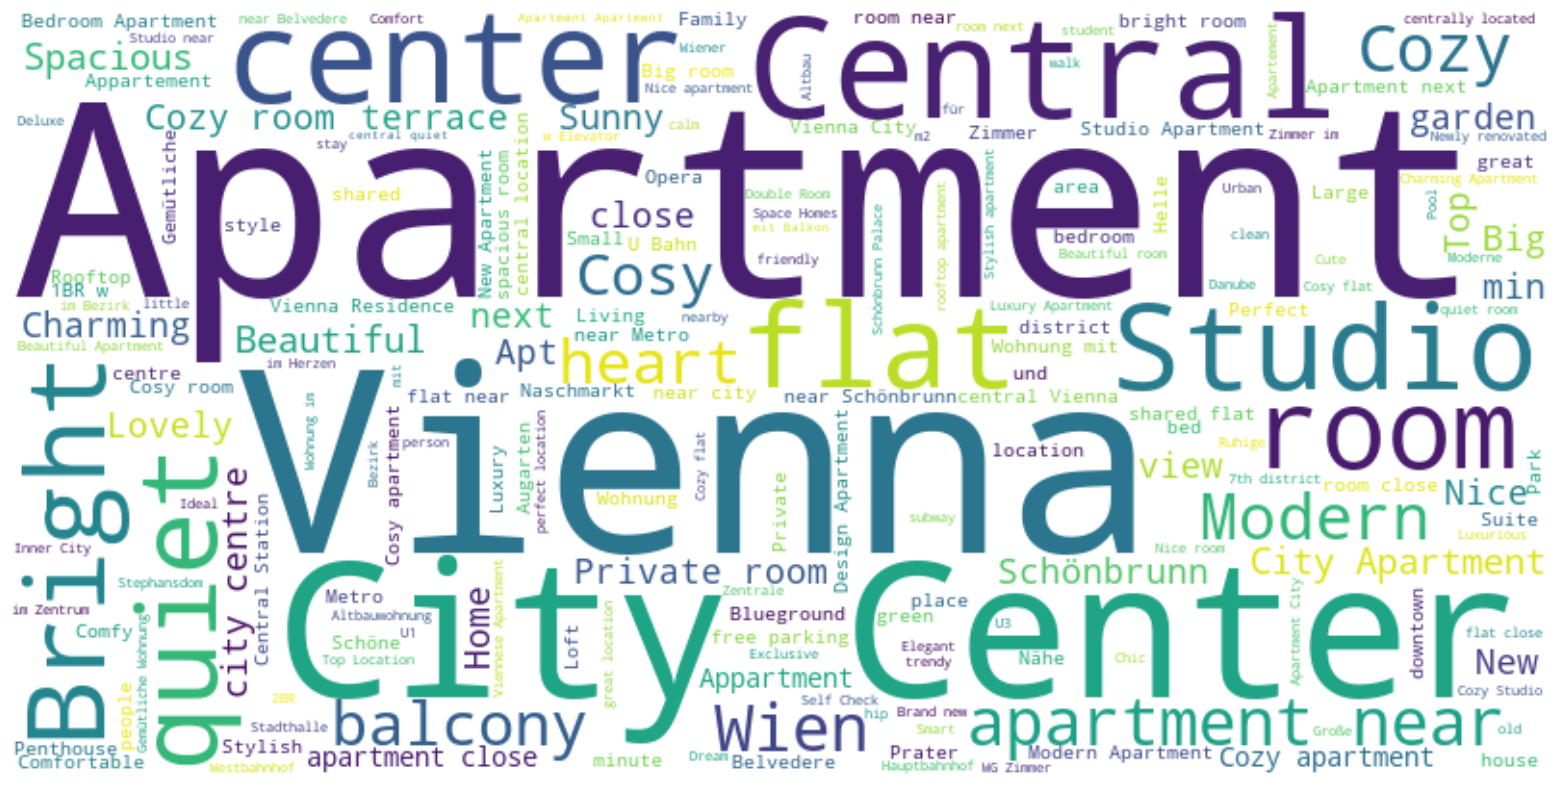

In [13]:
# Extract all words from sentences for 'NAMES' column
all_words = ' '.join([text for text in listings['name']])

# Create a wordcloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_words)

# Show the image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Neighbourhoods with most listings?

In [14]:
query = "SELECT neighbourhood, COUNT (DISTINCT host_id) AS number_of_listings FROM listings GROUP BY neighbourhood ORDER BY number_of_listings DESC"
nr_of_listings = pd.read_sql_query(query, con=engine)

In [15]:
fig = px.line(nr_of_listings, x='neighbourhood', y='number_of_listings', title='Number of total listings per neighbourhood', markers=True)
fig.show()
nr_of_listings

,neighbourhood,number_of_listings
0,Leopoldstadt,720
1,Landstra§e,625
2,Rudolfsheim-Fnfhaus,506
3,Neubau,502
4,Alsergrund,441
5,Margareten,424
6,Mariahilf,412
7,Favoriten,389
8,Ottakring,383
9,Wieden,334


#### Average review rate per neighbourhood group

In [16]:
query = "SELECT neighbourhood, CAST(AVG(number_of_reviews_ltm) AS DECIMAL(10,2)) AS avg_number_of_reviews_per_year FROM listings GROUP BY neighbourhood ORDER BY avg_number_of_reviews_per_year DESC"
nr_of_reviews_per_neigh = pd.read_sql_query(query, con=engine)

In [17]:
fig = px.line(nr_of_reviews_per_neigh, x='neighbourhood', y='avg_number_of_reviews_per_year', title='Average number of reviews per neighbourhood', markers=True, labels={'avg_number_of_reviews_per_year':'Average number of reviews'})
fig.show()
nr_of_reviews_per_neigh

,neighbourhood,avg_number_of_reviews_per_year
0,Innere Stadt,9.16
1,Wieden,7.66
2,Favoriten,7.34
3,Rudolfsheim-Fnfhaus,7.30
4,Landstra§e,6.88
5,Neubau,6.66
6,Leopoldstadt,6.63
7,Meidling,6.44
8,Mariahilf,5.76
9,Margareten,5.61


#### Average availabilty per neighbourhood group

In [18]:
query = "SELECT neighbourhood, CAST(AVG(availability_365) as DECIMAL(10)) AS avg_availability FROM listings GROUP BY neighbourhood ORDER BY avg_availability DESC"
avg_availability = pd.read_sql_query(query, con=engine)

In [19]:
fig = px.line(avg_availability, x='neighbourhood', y='avg_availability', title='Average availability', markers=True, labels={'avg_availability':'Average availability'})
fig.show()
avg_availability

,neighbourhood,avg_availability
0,Liesing,177.0
1,Innere Stadt,177.0
2,Meidling,172.0
3,Donaustadt,170.0
4,Floridsdorf,167.0
5,Hietzing,162.0
6,Favoriten,160.0
7,Brigittenau,155.0
8,Landstra§e,152.0
9,Simmering,151.0


#### Correlation with neighbourhood location and rating 

In [20]:
query = "SELECT neighbourhood, CAST(AVG(avg_score_rating) AS DECIMAL(10,2)) AS general_score, CAST(AVG(review_scores_location) AS DECIMAL(10,2)) AS review_scores_location FROM listings GROUP BY neighbourhood ORDER BY review_scores_location DESC"
nr_of_listings_rating = pd.read_sql_query(query, con=engine)
nr_of_listings_rating

,neighbourhood,general_score,review_scores_location
0,Innere Stadt,4.76,4.95
1,Neubau,4.77,4.88
2,Wieden,4.70,4.88
3,Josefstadt,4.69,4.86
4,Mariahilf,4.74,4.84
5,Landstra§e,4.71,4.78
6,Alsergrund,4.69,4.76
7,Leopoldstadt,4.68,4.75
8,Margareten,4.71,4.70
9,Hietzing,4.65,4.69


#### What room types are the most listed ?

In [21]:
query = "SELECT room_type, COUNT (DISTINCT host_id) AS number_of_listings FROM listings GROUP BY room_type ORDER BY number_of_listings DESC"
nr_of_room_types = pd.read_sql_query(query, con=engine)

In [22]:
fig = px.pie(nr_of_room_types, values='number_of_listings', names='room_type', title='Number of total listings per room type')
fig.show()
nr_of_room_types

,room_type,number_of_listings
0,Entire home/apt,4606
1,Private room,1955
2,Shared room,61
3,Hotel room,22


#### Ratings correlation

In [23]:
#Creaating ratings dataframe
listings_ratings = listings.loc[::,'review_scores_rating':'review_scores_value']

In [24]:
#Droping multiple null values
listings_ratings = listings_ratings.dropna(subset=['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], how='all')

In [25]:
#Rest of null filling averages you scew ratings if you do that
# listings_ratings.fillna(listings_ratings.review_scores_accuracy.mean(), inplace=True)
# listings_ratings.fillna(listings_ratings.review_scores_cleanliness.mean(), inplace=True)
# listings_ratings.fillna(listings_ratings.review_scores_checkin.mean(), inplace=True)
# listings_ratings.fillna(listings_ratings.review_scores_comation.mean(), inplacmunication.mean(), inplace=True)
# listings_ratings.fillna(listings_ratings.review_scores_loce=True)¸bb
# listings_ratings.fillna(listings_ratings.review_scores_value.mean(), inplace=True)
# listings_ratings.fillna(listings_ratings.review_scores_rating.mean(), inplace=True)

#### Which are the lowest scoring category ratings ?

In [26]:
listings_ratings.mean().sort_values(ascending=True)

review_scores_value            4.681631
review_scores_cleanliness      4.685502
review_scores_rating           4.715016
review_scores_location         4.731675
review_scores_accuracy         4.784943
review_scores_communication    4.818195
review_scores_checkin          4.839715
dtype: float64

In [27]:
corr_rating = listings_ratings.corr()
corr_rating

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.751179,0.734952,0.593405,0.659015,0.547857,0.753507
review_scores_accuracy,0.751179,1.000000,0.683785,0.657976,0.683080,0.574255,0.729572
review_scores_cleanliness,0.734952,0.683785,1.000000,0.555141,0.542826,0.479014,0.660246
review_scores_checkin,0.593405,0.657976,0.555141,1.000000,0.718482,0.509287,0.585798
review_scores_communication,0.659015,0.683080,0.542826,0.718482,1.000000,0.519527,0.622894
review_scores_location,0.547857,0.574255,0.479014,0.509287,0.519527,1.000000,0.614332
review_scores_value,0.753507,0.729572,0.660246,0.585798,0.622894,0.614332,1.000000


<AxesSubplot: >

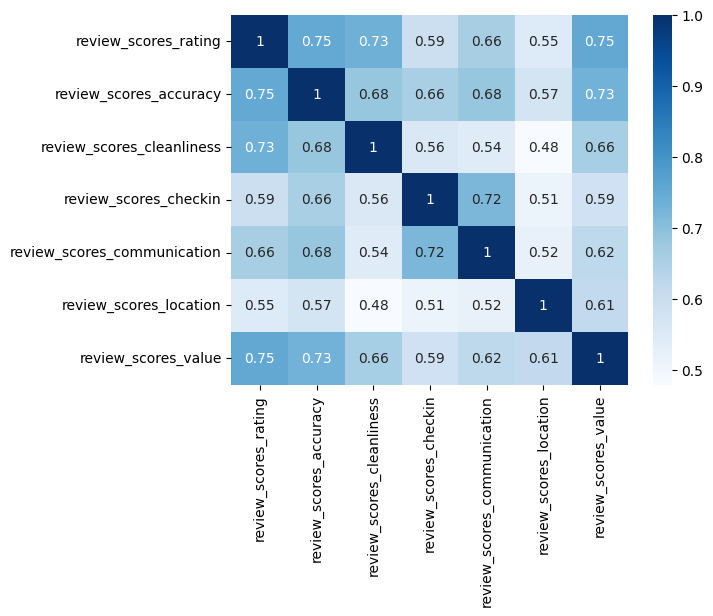

In [28]:
import seaborn as sns
sns.heatmap(corr_rating, cmap="Blues", annot=True)

#### Pivot table trend of room type and price

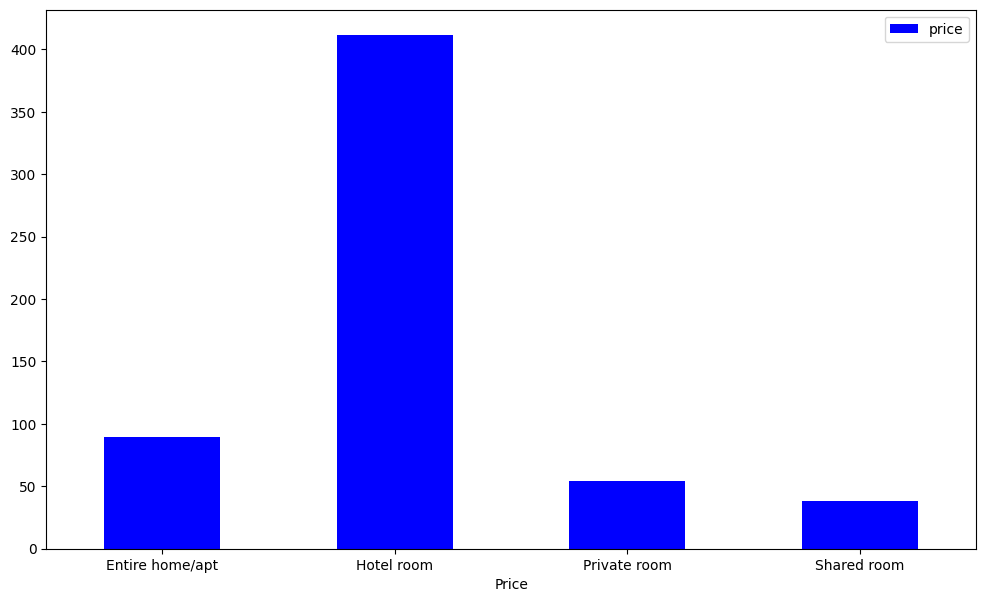

None

In [29]:
property_pivot = listings.pivot_table(index='room_type', values='price', aggfunc=np.mean)
property_pivot.plot(kind='bar', color='blue', figsize=(12,7))
plt.xlabel('Impact of room type on price')
plt.xlabel('Price')
plt.xticks(rotation=0)
display(plt.show())

#### Trend neighbourhood and price

In [30]:
query = "SELECT neighbourhood, CAST(AVG(price) AS DECIMAL(10)) as price FROM listings WHERE price > 0 GROUP BY neighbourhood ORDER BY price DESC"
listings_price_neigh = pd.read_sql_query(query, con=engine)

In [31]:
fig = px.line(listings_price_neigh, x='neighbourhood', y='price', markers=True, text='price')
fig.update_traces(textposition="top right")
fig.show()
listings_price_neigh

,neighbourhood,price
0,Innere Stadt,162.0
1,Hietzing,131.0
2,Neubau,118.0
3,Wieden,103.0
4,Donaustadt,87.0
5,Mariahilf,86.0
6,Dbling,85.0
7,Floridsdorf,84.0
8,Josefstadt,84.0
9,Landstra§e,82.0


#### Do superhost listings charge more?


In [32]:
query="SELECT neighbourhood, CAST(AVG(price) AS DECIMAL(10)) as price FROM listings WHERE host_is_superhost = 1 AND price > 0 GROUP BY neighbourhood ORDER BY price DESC"
super_host_charge = pd.read_sql_query(query, con=engine)
super_host_charge

,neighbourhood,price
0,Innere Stadt,144.0
1,Dbling,124.0
2,Wieden,120.0
3,Hernals,113.0
4,Josefstadt,103.0
5,Leopoldstadt,97.0
6,Margareten,91.0
7,Neubau,89.0
8,Mariahilf,88.0
9,Alsergrund,86.0


In [33]:
query="SELECT neighbourhood, CAST(AVG(price) AS DECIMAL(10)) as price FROM listings WHERE host_is_superhost = 0 AND price > 0 GROUP BY neighbourhood ORDER BY price DESC"
regular_host_charge = pd.read_sql_query(query, con=engine)
regular_host_charge

,neighbourhood,price
0,Innere Stadt,171.0
1,Hietzing,151.0
2,Neubau,131.0
3,Wieden,97.0
4,Floridsdorf,91.0
5,Donaustadt,89.0
6,Mariahilf,86.0
7,Landstra§e,81.0
8,Alsergrund,80.0
9,Josefstadt,78.0


In [34]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(name='Super Host', x=regular_host_charge['neighbourhood'], y=super_host_charge['price'], text=super_host_charge['price'], mode='lines+markers', textposition='top right'),
    go.Scatter(name='Regular host', x=regular_host_charge['neighbourhood'], y=regular_host_charge['price'], text=regular_host_charge['price'], mode='lines+markers', textposition='top right')
])
# Change the bar mode
fig.update_layout(barmode='group', autosize=True)
fig.update_yaxes(automargin=True)
fig.show()

#### Number of superhosts and regular hosts per neighbourhood

In [35]:
query="SELECT neighbourhood, COUNT(host_id) as number_of_hosts FROM listings WHERE host_is_superhost = 0 AND price > 0 GROUP BY neighbourhood ORDER BY number_of_hosts DESC"
regular_host_nr_reviews = pd.read_sql_query(query, con=engine)
regular_host_nr_reviews

,neighbourhood,number_of_hosts
0,Leopoldstadt,903
1,Landstra§e,731
2,Rudolfsheim-Fnfhaus,617
3,Alsergrund,521
4,Margareten,492
5,Favoriten,492
6,Neubau,478
7,Ottakring,426
8,Mariahilf,417
9,Innere Stadt,391


In [36]:
query="SELECT neighbourhood, COUNT(host_id) as number_of_hosts FROM listings WHERE host_is_superhost = 1 AND price > 0 GROUP BY neighbourhood ORDER BY number_of_hosts DESC"
super_host_nr_reviews = pd.read_sql_query(query, con=engine)
super_host_nr_reviews

,neighbourhood,number_of_hosts
0,Leopoldstadt,326
1,Landstra§e,314
2,Rudolfsheim-Fnfhaus,235
3,Neubau,209
4,Favoriten,202
5,Innere Stadt,201
6,Margareten,163
7,Brigittenau,162
8,Alsergrund,155
9,Mariahilf,151


In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(name='Super Host', x=regular_host_charge['neighbourhood'], y=super_host_nr_reviews['number_of_hosts'], text=super_host_nr_reviews['number_of_hosts'], mode='lines+markers+text', textposition='bottom left'),
    go.Scatter(name='Regular host', x=regular_host_charge['neighbourhood'], y=regular_host_nr_reviews['number_of_hosts'], text=regular_host_nr_reviews['number_of_hosts'], mode='lines+markers+text', textposition='top right')
])
# Change the bar mode
fig.update_layout(barmode='group', autosize=True)
fig.update_yaxes(automargin=True)
fig.show()

#### Number of instantly bookable listings

In [38]:
query="SELECT room_type, SUM(CASE instant_bookable WHEN 1 THEN 1 ELSE 0 END) as commercial_listings, SUM(CASE instant_bookable WHEN 0 THEN 1 ELSE 0 END) as private_listings FROM listings GROUP BY room_type"
nr_commercial_listings = pd.read_sql_query(query, con=engine)

In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=nr_commercial_listings.room_type, values=nr_commercial_listings.commercial_listings, name="Commercial listings"),
              1, 1)
fig.add_trace(go.Pie(labels=nr_commercial_listings.room_type, values=nr_commercial_listings.private_listings, name="Private listings"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Number of instant bookable listings",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Instant', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Regular', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()
nr_commercial_listings

,room_type,commercial_listings,private_listings
0,Entire home/apt,4551,3999
1,Shared room,28,47
2,Private room,1095,1666
3,Hotel room,52,14


In [40]:
# 7 is median
query = "SELECT host_id AS id, AVG(price) AS price, AVG(avg_score_rating) AS rating, SUM(number_of_reviews) as num_reviews \
    FROM listings GROUP BY host_id ORDER BY num_reviews DESC"
listings_hosts_areas = pd.read_sql_query(query, con=engine)

In [41]:
listings_hosts_areas.head()

,id,price,rating,num_reviews
0,47034279.0,195.173913,4.917391,5440.0
1,1643928.0,82.821429,4.379286,4470.0
2,1108400.0,98.636364,4.569643,3621.0
3,66040140.0,59.750000,4.751563,3420.0
4,1547126.0,118.351351,4.842500,3041.0


#### General response rate 

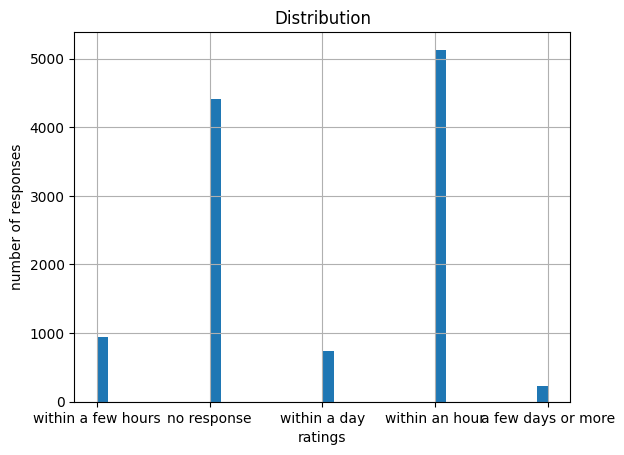

In [42]:
listings['host_response_time'].hist(bins=40)
plt.title('Distribution')
plt.xlabel('ratings')
plt.ylabel('number of responses')
plt.show()

#### Correlation of within an hour response time on communcation rating

In [43]:
query="SELECT host_response_time, COUNT(host_id) as number_of_hosts, \
CAST(AVG (review_scores_rating) as DECIMAL(10,2)) AS scores_avg, CAST(AVG (review_scores_cleanliness) as DECIMAL(10,2)) AS clean_avg, \
CAST(AVG (review_scores_checkin) as DECIMAL(10,2)) AS checkin_avg, CAST(AVG (review_scores_communication) as DECIMAL(10,2)) AS comm_avg, \
CAST(AVG (review_scores_location) as DECIMAL(10,2)) AS location_avg, CAST(AVG (review_scores_value) as DECIMAL(10,2)) AS val_avg \
FROM listings GROUP BY host_response_time ORDER BY number_of_hosts DESC"
no_response_rating = pd.read_sql_query(query, con=engine)
no_response_rating

,host_response_time,number_of_hosts,scores_avg,clean_avg,checkin_avg,comm_avg,location_avg,val_avg
0,within an hour,5129,4.70,4.70,4.84,4.80,4.73,4.66
1,no response,4408,4.59,4.64,4.84,4.84,4.73,4.71
2,within a few hours,947,4.75,4.77,4.87,4.85,4.76,4.71
3,within a day,737,4.69,4.70,4.82,4.81,4.71,4.68
4,a few days or more,231,4.54,4.60,4.77,4.72,4.77,4.65


#### General distribution ratings of listings

In [44]:
#general distribution
listings_hosts_areas['rating'].value_counts().describe()

count    545.000000
mean       9.721101
std       34.292846
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      497.000000
Name: rating, dtype: float64

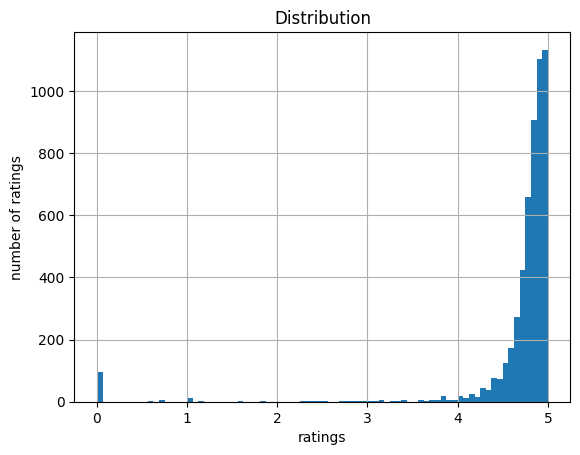

In [48]:
listings_hosts_areas['rating'].hist(bins=80)
plt.title('Distribution')
plt.xlabel('ratings')
plt.ylabel('number of ratings')
plt.show()

In [46]:
query = "SELECT neighbourhood, AVG(avg_score_rating) AS rating, number_of_reviews\
    FROM listings WHERE avg_score_rating IS NOT NULL AND number_of_reviews >= 14 GROUP BY neighbourhood, number_of_reviews"
listings_neighbourhood = pd.read_sql_query(query, con=engine)


print(listings_neighbourhood.groupby(['neighbourhood'], dropna=True).mean())

                        rating  number_of_reviews
neighbourhood                                    
Alsergrund            4.812421          97.758929
Brigittenau           4.779933          97.478261
Donaustadt            4.825308          67.385965
Dbling               4.816708          64.704545
Favoriten             4.768629         110.483051
Floridsdorf           4.810374          66.310345
Hernals               4.717083          66.403846
Hietzing              4.816644          81.837838
Innere Stadt          4.813776         129.471831
Josefstadt            4.836983         106.340909
Landstra§e            4.790977         137.011364
Leopoldstadt          4.767418         147.574586
Liesing               4.862407          36.277778
Margareten            4.797738         113.690476
Mariahilf             4.819624         124.973684
Meidling              4.800555          83.085106
Neubau                4.840508         146.453947
Ottakring             4.777521          92.229167


In [47]:
query = "SELECT neighbourhood, AVG(avg_score_rating) AS rating\
    FROM listings WHERE avg_score_rating IS NOT NULL AND number_of_reviews > 0 GROUP BY neighbourhood, number_of_reviews"
listings_neighbourhood = pd.read_sql_query(query, con=engine)


print(listings_neighbourhood.groupby(['neighbourhood'], dropna=True).mean())


                        rating
neighbourhood                 
Alsergrund            4.803255
Brigittenau           4.772763
Donaustadt            4.792773
Dbling               4.789566
Favoriten             4.764007
Floridsdorf           4.749992
Hernals               4.692512
Hietzing              4.769704
Innere Stadt          4.805813
Josefstadt            4.819189
Landstra§e            4.784235
Leopoldstadt          4.761139
Liesing               4.796236
Margareten            4.787291
Mariahilf             4.811352
Meidling              4.786212
Neubau                4.833355
Ottakring             4.760853
Penzing               4.753241
Rudolfsheim-Fnfhaus  4.778119
Simmering             4.767193
Wieden                4.794448
Whring               4.785827
